<a href="https://colab.research.google.com/github/Shreelakshmi99/shreelakshmi/blob/master/Bank_Loan_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **MARKETING CAMPAIGN FOR BANKING PRODUCTS**

**DATA DESCRIPTION :**  

 The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.


 
**DATA** : https://www.kaggle.com/itsmesunil/bank_loan_modelling/download




 

 **DOMAIN** : Banking



 

 **CONTEXT** :   


  The bank has a growing customer base. The bank wants to increase borrowers (asset
customers) base to bring in more loan business and earn more through the interest on
loans. So , the bank wants to convert the liability based customers to personal loan
customers. (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. The
department wants you to build a model that will help them identify the potential
customers who have a higher probability of purchasing the loan. This will increase the
success ratio while at the same time reduce the cost of the campaign.


 **OBJECTIVES** :   
   The classification goal is to predict the likelihood of a liability customer buying personal loans which means we have to build a model which will be used to predict which customer will most likely to accept the offer for personal loan, based on the specific relationship with the bank across various features given in the dataset. Here I will be using the Supervised Learning methods to predict which model is best for this problem amongst Logistic Regresssion, Decision Tree classifier and Random Forest Algorigthm.

**1. IMPORTING REQUIRED LIBRARIES FOR EDA**

In [123]:
import pandas as pd
import numpy as np
import seaborn as sns                    #visualization
import matplotlib.pyplot as plt          #visualization
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)


In [63]:
from google.colab import files
uploaded = files.upload()            

Saving Bank.csv to Bank (1).csv


**1.1 LOADING THE DATA INTO DATA FRAME**





In [64]:
import io
#df = pd.read_excel(io.BytesIO(uploaded['Bank_Personal_Loan_Modelling.xlsx']))
dataset = pd.read_csv(io.BytesIO(uploaded['Bank.csv']))
dataset.head(10)                #displaying first 10 rows

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [65]:
dataset.tail(10)                 #displaying last 10 rows

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


**1.2 CHECKING THE TYPES OF DATA AND BASIC SUMMARY STATS**

In [66]:
# TO display data type of each column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [67]:
# TO DISPLAY THE SUMMARY STATS WHICH INCLUDE COUNT,MEAN,STD,MIN,MAX...
dataset.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [68]:
dataset.shape

(5000, 14)

**1.3** **TO DISPLAY HOW MANY NULL VALUES ARE PRESENT IN EACH COLUMN**

In [69]:
dataset.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

 **2**. **CLEANING** **THE DATA** **FOR ANY OF THE VARIABLES**

In [70]:
dataset[dataset['Experience'] < 0]['Experience'].value_counts()         ## Counts number of negative value in experience column..

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

**2.1 REPLACING FAULTY VALUE BY FINDING MEDIAN**

In [71]:
dataset['Experience'].replace(to_replace = -1,value = np.nan,inplace = True)
dataset['Experience'].replace(to_replace = -2,value = np.nan,inplace = True)
dataset['Experience'].replace(to_replace = -3,value = np.nan,inplace = True)

dataset['Experience'].fillna(dataset['Experience'].median(),inplace=True)

dataset.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.327600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.253035,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,11.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**OBSERVATION** : Faulty values (negative values) present in Experience column are replaced by finding median...

**2.2 DROPPING IRRELEVENT COLUMNS**

In [72]:
dataset=dataset.drop(['ID'],axis=1)
dataset.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1.0,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19.0,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8.0,45,91330,4,1.0,2,0,0,0,0,0,1


**OBSERVATION :** As ID column is irrelevent for the above analysis, therefore it is dropped.

**3. EDA** : **EXPLORATORY DATA ANALYSIS**

**3.1 NUMBER OF UNIQUE IN EACH COLUMN**

In [73]:
dataset.nunique()

Age                    45
Experience             44
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [74]:
dataset.drop('ZIP Code', axis = 1)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1.0,49,4,1.6,1,0,0,1,0,0,0
1,45,19.0,34,3,1.5,1,0,0,1,0,0,0
2,39,15.0,11,1,1.0,1,0,0,0,0,0,0
3,35,9.0,100,1,2.7,2,0,0,0,0,0,0
4,35,8.0,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3.0,40,1,1.9,3,0,0,0,0,1,0
4996,30,4.0,15,4,0.4,1,85,0,0,0,1,0
4997,63,39.0,24,2,0.3,3,0,0,0,0,0,0
4998,65,40.0,49,3,0.5,2,0,0,0,0,1,0


**OBSERVATION** : Zip code has 467 unique values and it is of the type nominal which in turn has to be converted to numerical type. Hence,need to create       467 dummy columns which will affect the model. Therefore Zip code column has to be dropped..

**3.2 NUMBER OF PEOPLE WITH ZERO MORTGAGE**

In [75]:
(dataset.Mortgage ==0).sum()    # There are 3462 people with 0 Mortgage out of 5000(making it skewed)

3462

**3.3 NUMBER OF PEOPLE WITH 0 CREDIT CARD SPENDING PER MONTH**

In [76]:
(dataset.CCAvg == 0).sum()      # There are 106 people with 0 average credit card spending per month

106

**3.4 VALUE COUNT FOR ALL CATEGORICAL COLUMNS**

In [77]:
dataset.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [78]:
dataset.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [79]:
dataset['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [80]:
dataset['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [81]:
dataset['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [82]:
dataset.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

**3.5 UNIVARIATE ANALYSIS**

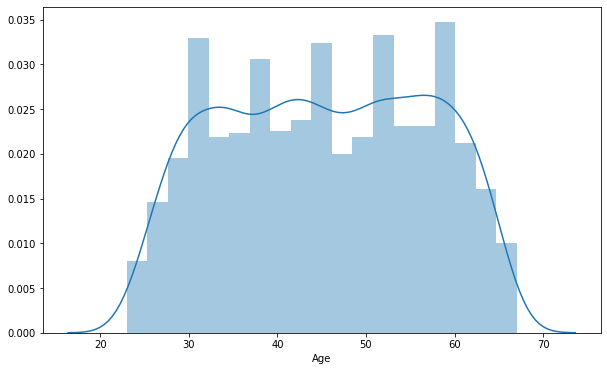

In [83]:
sns.distplot(dataset.Age);

**OBSERVATION** : Age seems to have Symmetric Distribution. Hence, there is no need to normalize this column...

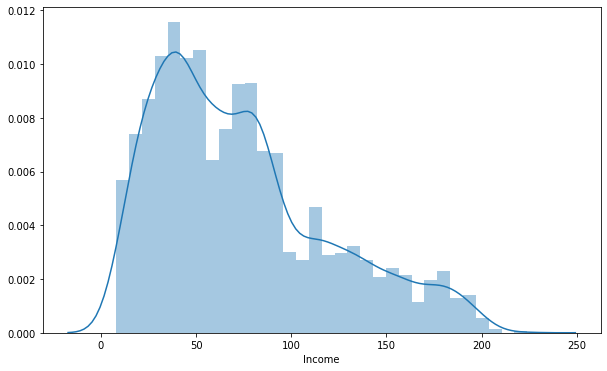

In [84]:
sns.distplot(dataset.Income);      

**OBSERVATION :** Income seems to be Right Skewed Distribution..

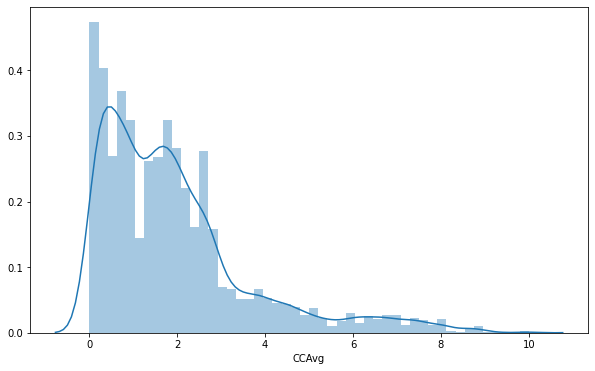

In [85]:
sns.distplot(dataset.CCAvg);

**OBSERVATION** : Credit Card Average is Right Skewed Distribution..

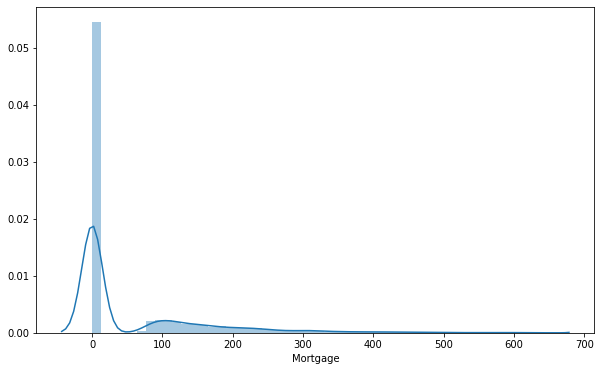

In [86]:
sns.distplot(dataset.Mortgage);

**OBSERVATION** : Mortgage column seems to be highly Skewed..

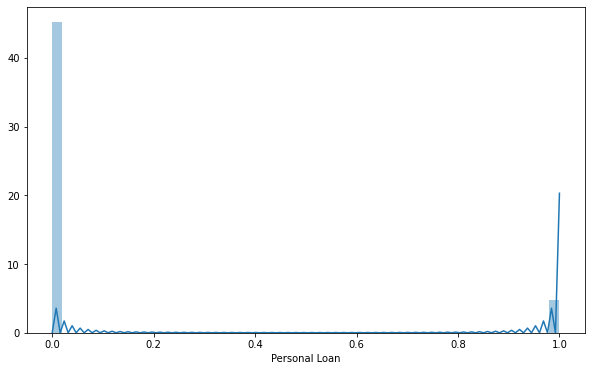

In [87]:
sns.distplot(dataset['Personal Loan'])

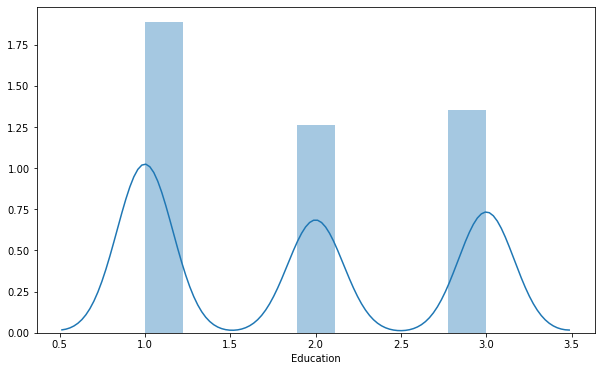

In [88]:
sns.distplot(dataset['Education'])

**OBSERVATION** :  Undergrad level customers are more than the Graduate and Advanced/Professional customers.

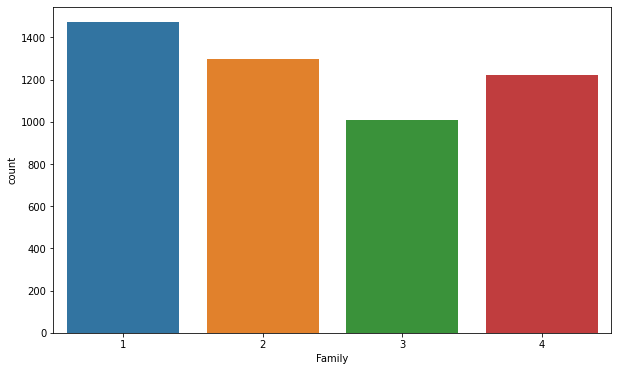

In [89]:
sns.countplot(dataset.Family);

**3.6 MULTIVARIATE ANALYSIS**

,Labels,Personal Loan
0,0,4520
1,1,480


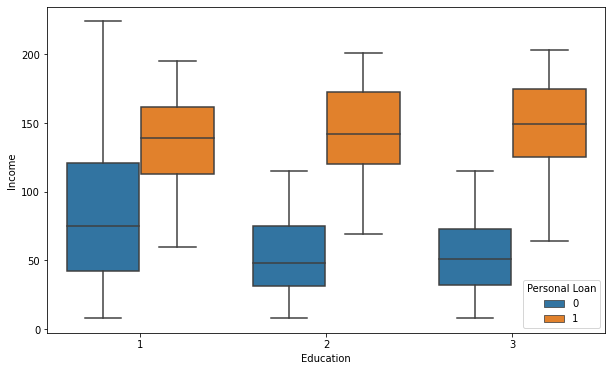

In [90]:
# It seems the customers who has more income is granted loan across each education level
sns.boxplot(x = 'Education',y = 'Income',hue = 'Personal Loan',data = dataset);
loan_counts = pd.DataFrame(dataset["Personal Loan"].value_counts()).reset_index()
loan_counts.columns =["Labels","Personal Loan"]
loan_counts                        # Out of 5000 data points, 4520 are labeled as 0 and 480 as 1.

**OBSERVATION** : From above we can say that customers with undergraduate level of education and family level greater than 3 are good customers who took loan. Customer who took loan have same income range irrespective of education level. Education of Graduate and above have more chance to take loan.



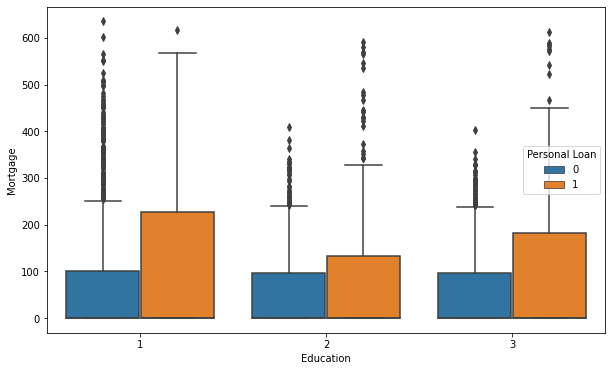

In [91]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=dataset)

**OBSERVATION** : From the above box plot we can see that customers whose education level is 1 and did not take loan has higher mortgage than customers who take loan of same education level. Customers whose education level is 2and 3 and did not take loan has lesser mortgage than customers who take loan of same education level.

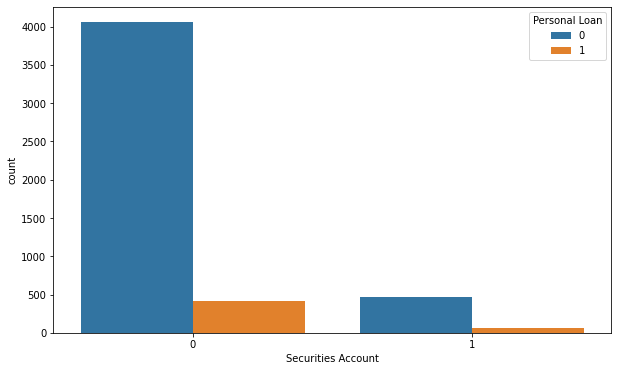

In [92]:
sns.countplot(x = 'Securities Account',data = dataset,hue = 'Personal Loan');       #Majority of people having Securities Account don't have Personal Loan

**OBSERVATION** : Customers who has securities account are more likly to take loan. Majority of customers who does not have loan do not have securities account

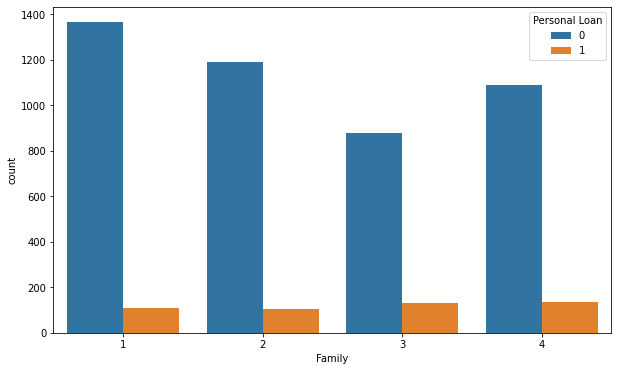

In [93]:
sns.countplot(x='Family',data=dataset,hue='Personal Loan')

**OBSERVATION**:  Family size does not have any impact in personal loan. But it seems families with size of 3 and 4 are more likely to take loan

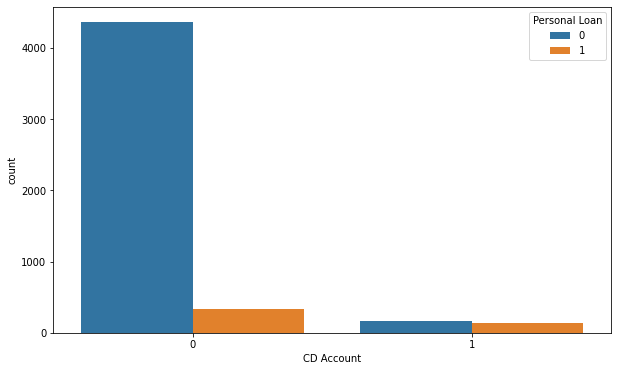

In [94]:
sns.countplot(x='CD Account',data=dataset,hue='Personal Loan')

**OBSERVATION**: Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well

Text(0.5, 1.0, 'CCAvg Distribution')

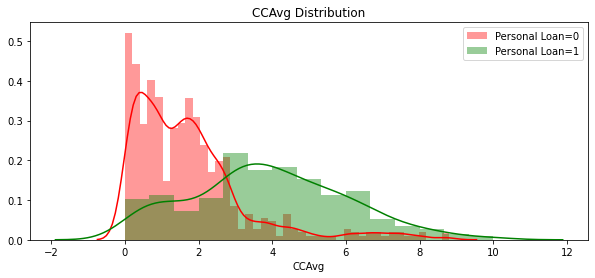

In [95]:
plt.figure(figsize=(10,4))
sns.distplot(dataset[dataset["Personal Loan"] == 0]['CCAvg'], color = 'r',label='Personal Loan=0')
sns.distplot(dataset[dataset["Personal Loan"] == 1]['CCAvg'], color = 'g',label='Personal Loan=1')
plt.legend()
plt.title("CCAvg Distribution")

**OBSERVATION** : Customers who have taken personal loan have higher credit card average than those who did not take loan. Therefore high credit card average will help in predicting whether the customer will take Personal loan or not.

Text(0.5, 1.0, 'Income Distribution')

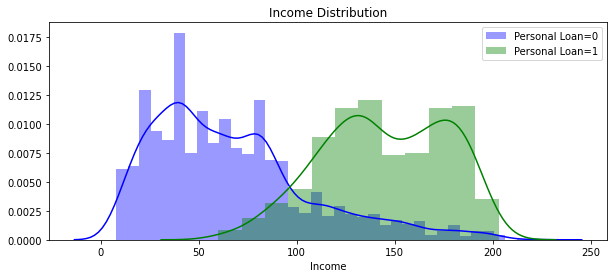

In [96]:
plt.figure(figsize=(10,4))
sns.distplot(dataset[dataset["Personal Loan"] == 0]['Income'], color = 'b',label='Personal Loan=0')
sns.distplot(dataset[dataset["Personal Loan"] == 1]['Income'], color = 'g',label='Personal Loan=1')
plt.legend()
plt.title("Income Distribution")

**OBSERVATION** : Customers who have taken personal loan have income than that of customers who have not taken. Therefore high income seems to be good predictor of whether or not a customer will take a personal loan.

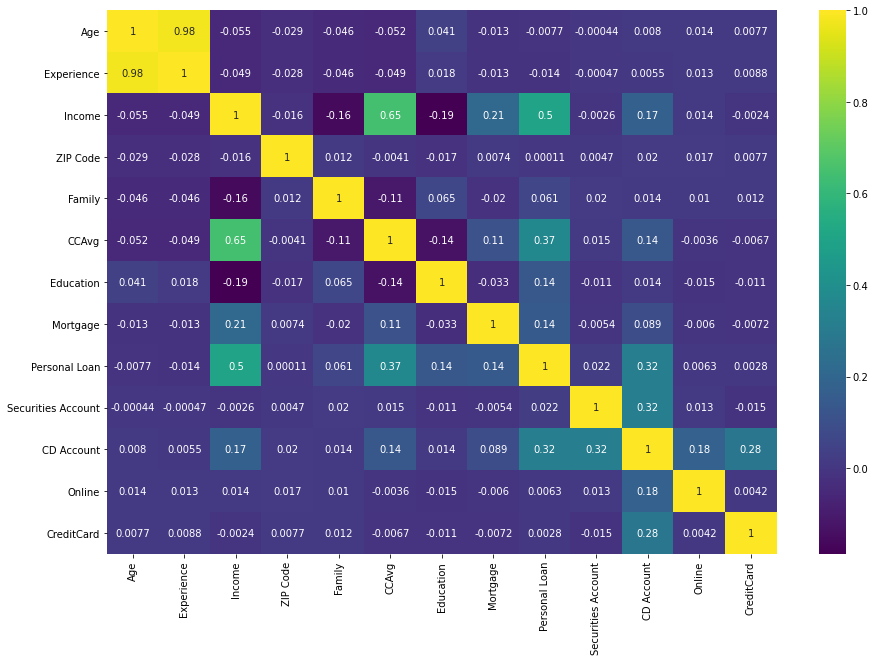

In [97]:
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(dataset.corr(),cmap = 'viridis', annot = True);

**OBSERVATION**: From the above heatmap we can see that :



1.Age and Experience are highly correlated and the correlation is almost 1.   
2.Personal Loan has maximum correlation with 'Income', 'CCAvg', 'CD Account', 'Mortgage', and 'Education'.

3.'Income' influences 'CCAvg', 'Personal Loan', 'CD Account' and 'Mortgage'.   











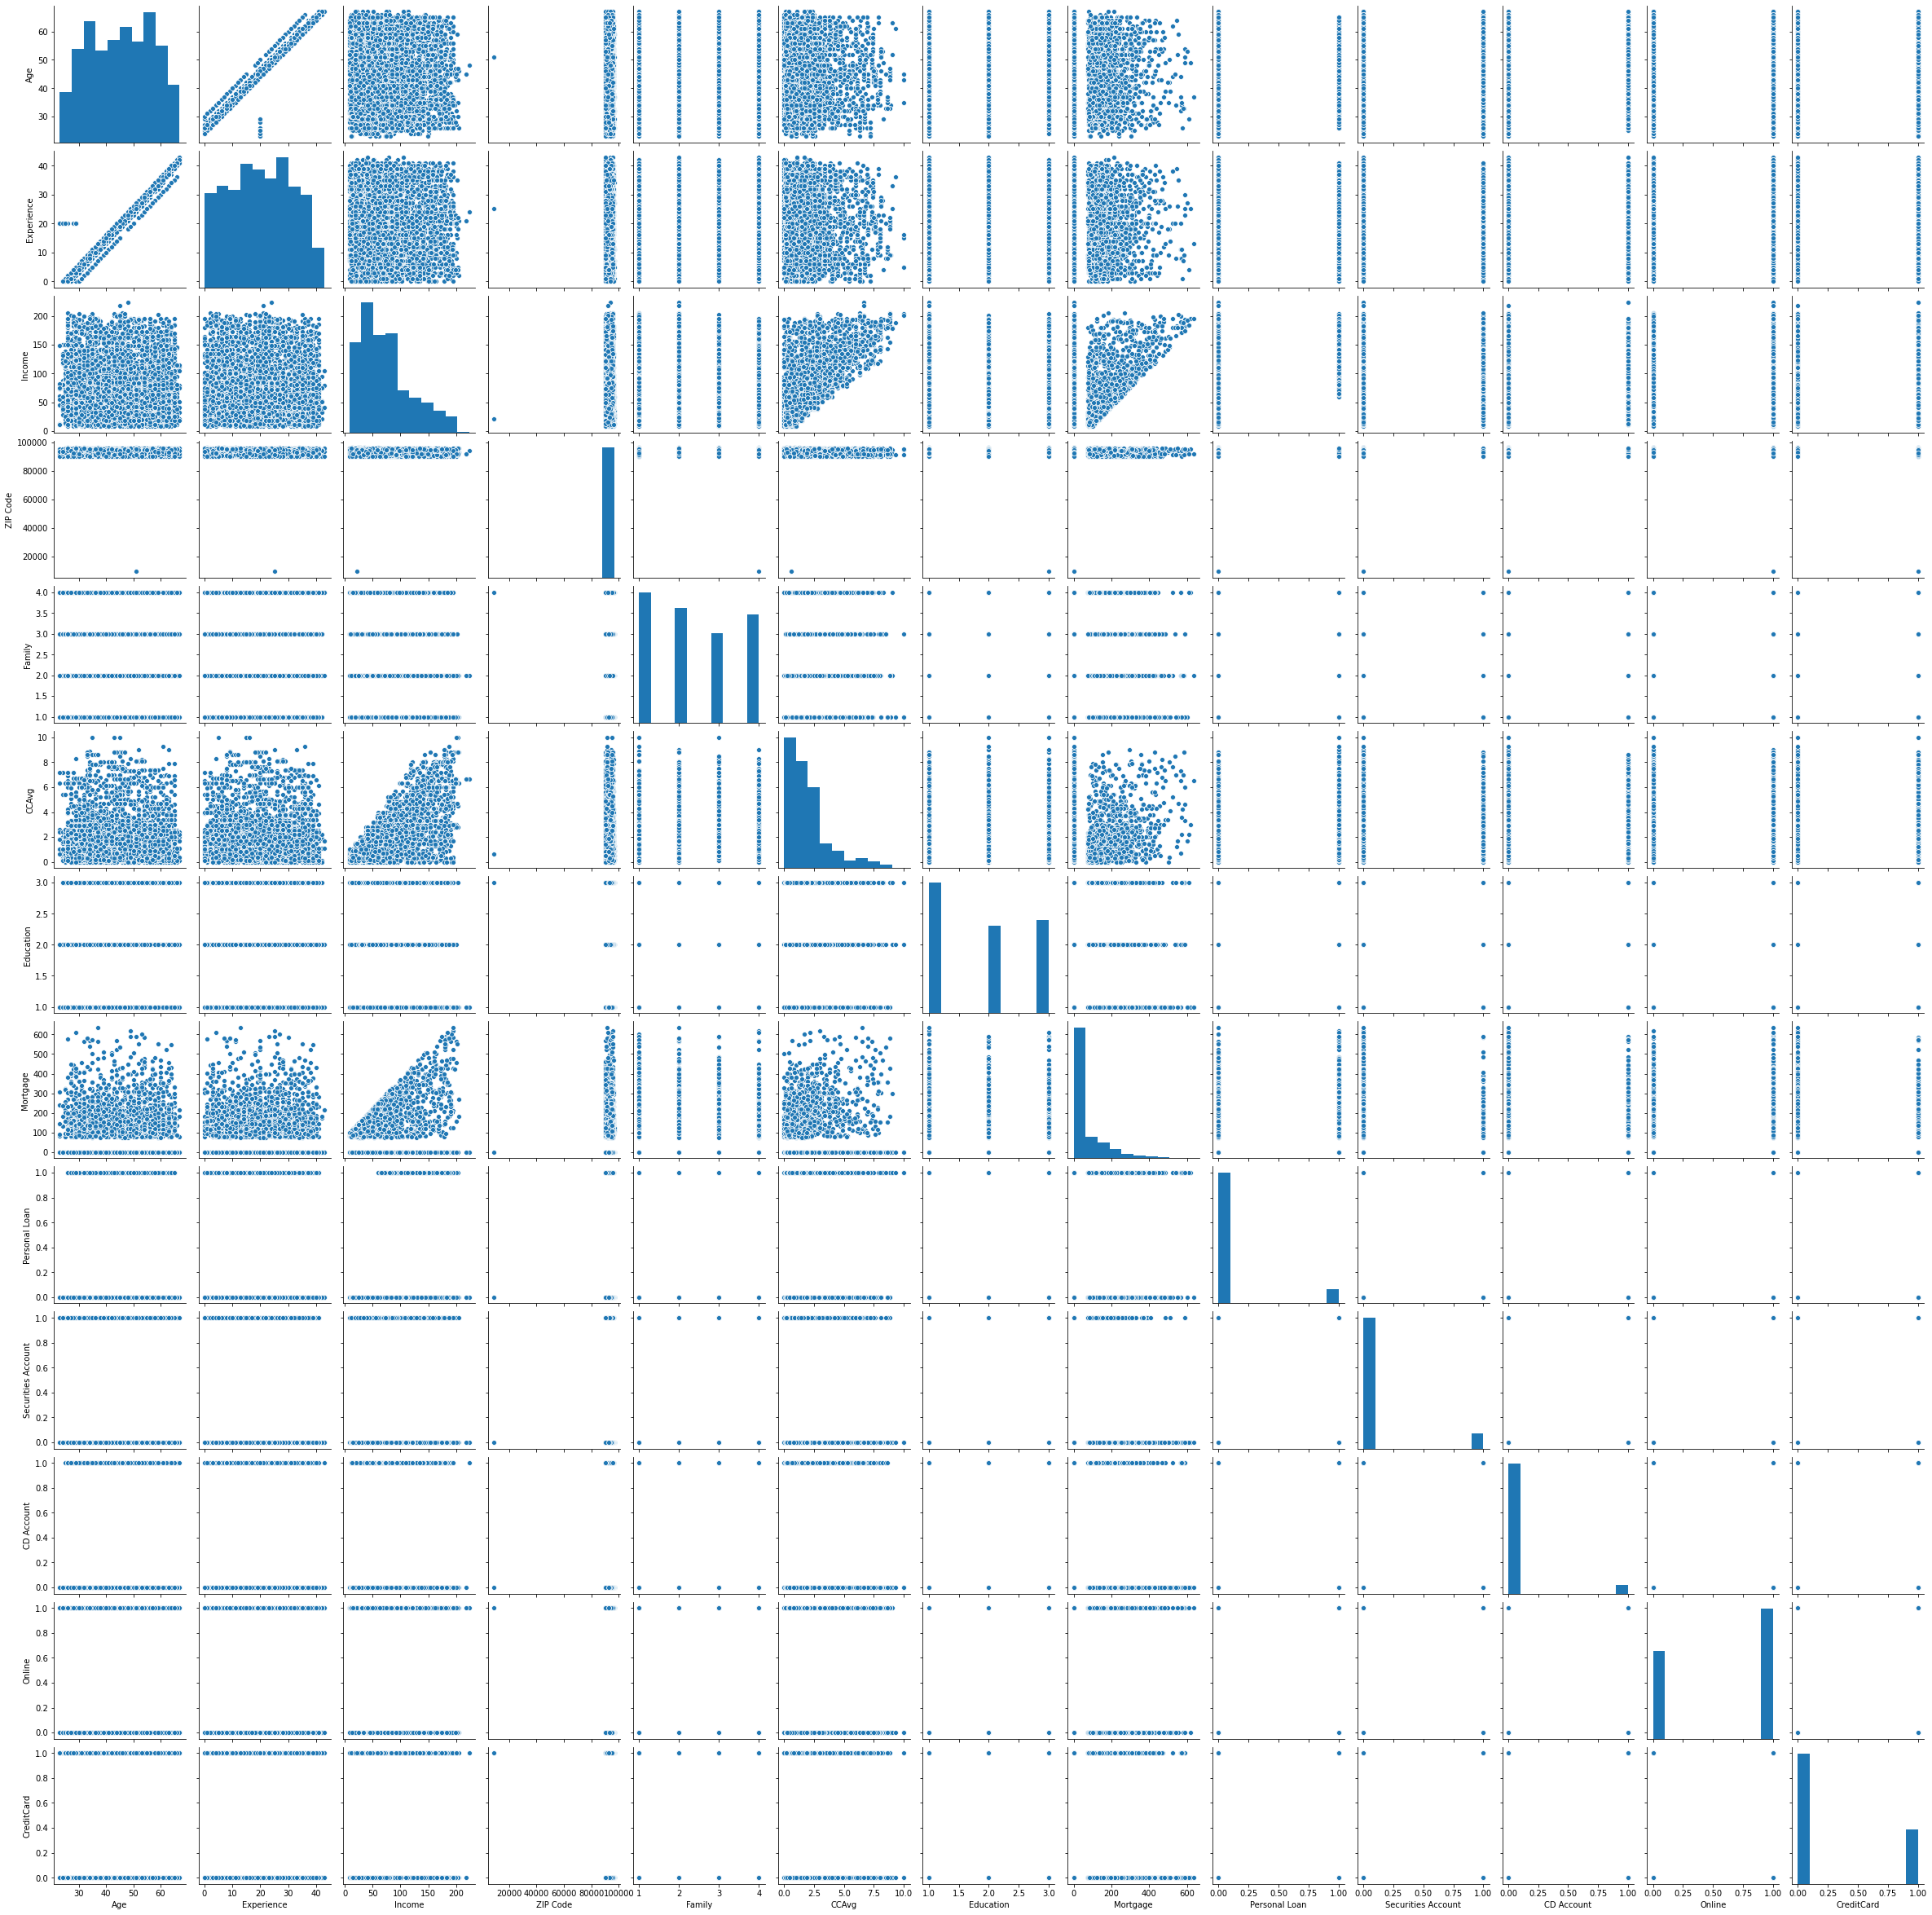

In [98]:
sns.pairplot(dataset)

In [99]:
data_X = dataset.loc[:,dataset.columns!="Personal Loan"]
data_Y = dataset[["Personal Loan"]]

**4. TRANSFORMATIONS OF FEATURE VARIABLES**

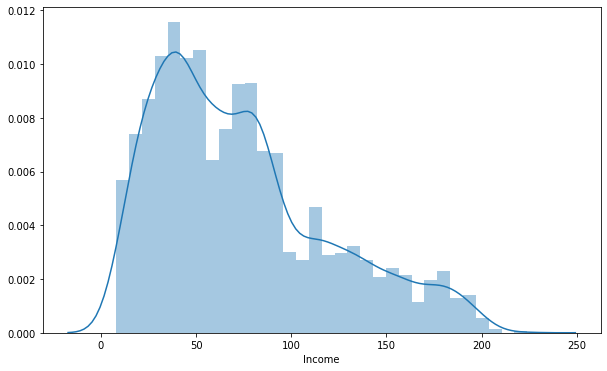

In [100]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method = "yeo-johnson", standardize = False)
pt.fit(data_X["Income"].values.reshape(-1,1))
temp = pt.transform(data_X["Income"].values.reshape(-1,1))
sns.distplot(data_X["Income"])

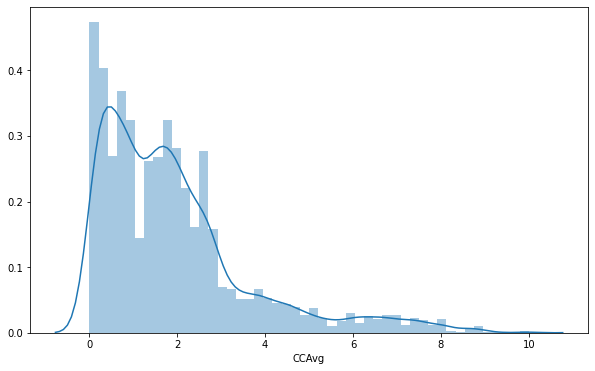

In [101]:
pt = PowerTransformer(method = "yeo-johnson", standardize = False)
pt.fit(data_X["CCAvg"].values.reshape(-1,1))
temp = pt.transform(data_X["CCAvg"].values.reshape(-1,1))
sns.distplot(data_X["CCAvg"])

In [102]:
data_X["Mortgage_Int"] = pd.cut(data_X["Mortgage"],
                                bins = [0,100,200,300,400,500,600,700],
                                labels = [0,1,2,3,4,5,6],
                                include_lowest = True)
data_X.drop("Mortgage", axis = 1, inplace = True)                      #Applying Binning

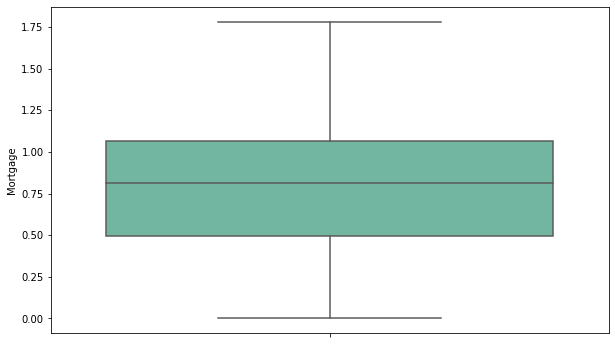

In [103]:
data_X["Mortgage"] = pd.Series(temp.flatten())
sns.boxplot(data_X["Mortgage"], orient = "v", palette="Set2")          # Checking if any outliers are there or no..

**OBSERVATION** : OuOutliers in the Mortgage column is removed by applying BINNING method, and the above plot confirms that there are no more outliers present in the Mortgage column..

In [104]:
data_X.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int,Mortgage
0,25,1.0,49,91107,4,1.6,1,1,0,0,0,0,0.845160
1,45,19.0,34,90089,3,1.5,1,1,0,0,0,0,0.814478
2,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0.633777
3,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,1.107427
4,35,8.0,45,91330,4,1.0,2,0,0,0,1,0,0.633777


In [105]:
data_X.shape, data_Y.shape

((5000, 13), (5000, 1))

**5. SPLITTING THE DATA USING STRATIFIED SAMPLING**

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size = 0.3, stratify=data_Y, random_state=100)      ## Splitting the data in 70:30 ratio
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3500, 13), (1500, 13), (3500, 1), (1500, 1))

In [107]:
X_train.reset_index(drop = True, inplace = True);
X_test.reset_index(drop = True, inplace = True);
y_train.reset_index(drop = True, inplace = True);
y_test.reset_index(drop = True, inplace = True);


In [108]:
X_train.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int,Mortgage
0,28,4.0,112,90049,2,1.6,2,0,0,1,0,0,0.845160
1,49,24.0,13,94608,1,0.4,3,1,0,0,0,1,0.322049
2,43,18.0,50,91006,4,1.9,3,0,0,0,0,0,0.928941
3,60,35.0,33,90095,2,0.5,2,0,0,1,0,0,0.384645
4,57,33.0,24,95616,4,0.7,1,0,0,1,0,0,0.495350


In [ ]:
from sklearn.preprocessing import StandardScaler
for ind, column in enumerate(X_train.columns):
  scaler = StandardScaler()
  
  # FIT TO TRAIN DATA
  scaler.fit(X_train[[column]])

  # TRANSFORM TRAIN DATA
  np_array = scaler.transform(X_train[[column]])
  X_train.loc[:, column] = pd.Series(np_array.flatten())

  # TRANSFORM TEST DATA
  np_array = scaler.transform(X_test[[column]])
  X_test.loc[:, column] = pd.Series(np_array.flatten())

**6. BUILDING THE MODEL :**

In [110]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# CONVERT DATAFRAMES TO NUMPY ARRAYS
np_X_train = X_train.values
np_y_train = y_train.values
np_X_test  = X_test.values
np_y_test  = y_test.values     

**FUNCTION FOR CONFUSION MATRIX :**

In [111]:
## FUNCTION TO GET CONFUSION MATRIX : Calling confusion matrix function avoids tedious job of writing the same code for all other models...
def draw_cm(actual,predicted):
  cm = confusion_matrix(actual,predicted)
  sns.heatmap(cm, annot = True, fmt='.2f', xticklabels = [0,1], yticklabels = [0,1])
  plt.ylabel('Observed')
  plt.xlabel('Predicted')
  plt.show()

**LEARNERS**

In [112]:
cls_1 = LogisticRegression(random_state = 100)
cls_2 = DecisionTreeClassifier(random_state = 100, max_depth = 8)
cls_3 = RandomForestClassifier(random_state = 100, n_estimators = 500, max_depth = 8)

**6.1 LOGISTIC REGRESSION MODEL :**

In [113]:
# FIT cls_1 on X_train AND PREDICT ON X_test
cls_1.fit(np_X_train, np_y_train.ravel())
pred_1_X_test = cls_1.predict(np_X_test)
pred_1_X_train = cls_1.predict(np_X_train)
acc_1_X_train = accuracy_score(np_y_train, pred_1_X_train)
acc_1_X_test = accuracy_score(np_y_test, pred_1_X_test)
print("Base Learner 1 accuracy on np_X_train: {: .4f}".format(acc_1_X_train))
print("Base Learner 1 accuracy on np_X_test: {: .4f}".format(acc_1_X_test))

Base Learner 1 accuracy on np_X_train:  0.9514
Base Learner 1 accuracy on np_X_test:  0.9493


In [114]:
np_y_test.shape

(1500, 1)

**6.1.1 CONFUSION MATRIX :**

CONFUSION MATRIX


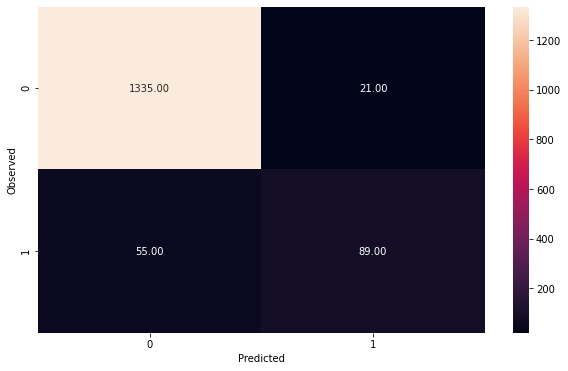

None


In [115]:
print('CONFUSION MATRIX')
print(draw_cm(np_y_test,pred_1_X_test.reshape(-1,1)))                 ## Calling function

In [116]:
print("Recall:",recall_score(np_y_test,pred_1_X_test))
print()
print("Precision:",precision_score(np_y_test,pred_1_X_test))
print()
print("F1 Score:",f1_score(np_y_test,pred_1_X_test))
print()
print("ROC Auc Score:",roc_auc_score(np_y_test,pred_1_X_test))
print()

Recall: 0.6180555555555556

Precision: 0.8090909090909091

F1 Score: 0.7007874015748031

ROC Auc Score: 0.8012844149459194



**OBSERVATION :**  Logistic Regression Model Accuracy Score  : 95.14.
     
**Confusion Matrix** :
*   True Positive : 1335
*   True Negative : 89 


*   False Positive : 21
*   False Negative : 55  
To start with the analysis this accuracy of Logistic Regression model is appreciable but, the analysis still have the scope to get better accuracy..Hence, Let me try analyzing with Decision Tree..




**6.2 DECISION TREE MODEL :**

In [117]:
# FIT cls_2 on X_train AND PREDICT ON X_test
cls_2.fit(np_X_train, np_y_train.ravel())
pred_2_X_test = cls_2.predict(np_X_test)
pred_2_X_train = cls_2.predict(np_X_train)
acc_2_X_train = accuracy_score(np_y_train, pred_2_X_train)
acc_2_X_test = accuracy_score(np_y_test, pred_2_X_test)
print("Base Learner 2 accuracy on np_X_train: {: .4f}".format(acc_2_X_train))
print("Base Learner 2 accuracy on np_X_test: {: .4f}".format(acc_2_X_test))

Base Learner 2 accuracy on np_X_train:  0.9951
Base Learner 2 accuracy on np_X_test:  0.9833


**6.2.1 CONFUSION MATRIX :**

CONFUSION MATRIX


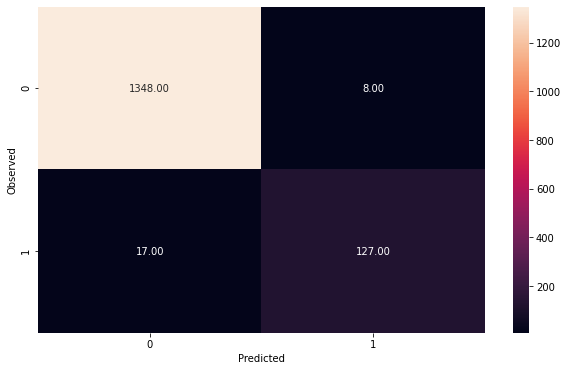

None


In [118]:
print('CONFUSION MATRIX')
print(draw_cm(np_y_test,pred_2_X_test.reshape(-1,1)))               ## Calling function

In [119]:
print("Recall:",recall_score(np_y_test,pred_2_X_test))
print()
print("Precision:",precision_score(np_y_test,pred_2_X_test))
print()
print("F1 Score:",f1_score(np_y_test,pred_2_X_test))
print()
print("ROC Auc Score:",roc_auc_score(np_y_test,pred_2_X_test))
print()

Recall: 0.8819444444444444

Precision: 0.9407407407407408

F1 Score: 0.9103942652329748

ROC Auc Score: 0.9380223697148476



**OBSERVATION :** Decision Tree Classifier Model Accuracy Score : 99.51   
        **Confusion Matrix :**   


*   True Positive : 1348
*   True Negative : 127


*   False Positive : 8
*   False Negative : 17


Accuracy seems pretty good for the above analysis with this algorithm..


**6.3 RANDOM FOREST MODEL**

In [120]:
# FIT cls_3 on X_train AND PREDICT ON X_test
cls_3.fit(np_X_train, np_y_train.ravel())
pred_3_X_test = cls_3.predict(np_X_test)
pred_3_X_train = cls_3.predict(np_X_train)
acc_3_X_train = accuracy_score(np_y_train, pred_3_X_train)
acc_3_X_test = accuracy_score(np_y_test, pred_3_X_test)
print("Base Learner 3 accuracy on np_X_train: {: .4f}".format(acc_3_X_train))
print("Base Learner 3 accuracy on np_X_test: {: .4f}".format(acc_3_X_test))

Base Learner 3 accuracy on np_X_train:  0.9951
Base Learner 3 accuracy on np_X_test:  0.9880


**6.3.1 CONFUSION MATRIX**

CONFUSION MATRIX


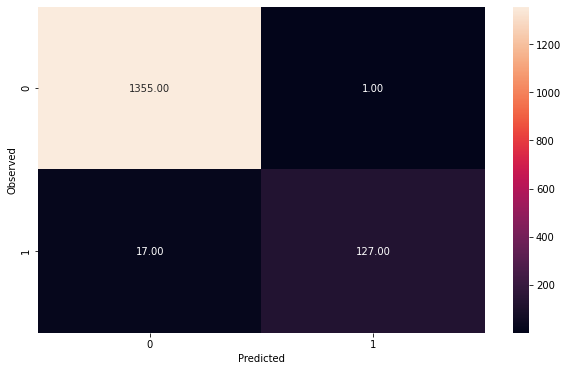

None


In [121]:
print('CONFUSION MATRIX')
print(draw_cm(np_y_test,pred_3_X_test.reshape(-1,1)))             ## Calling function

In [122]:
print("Recall:",recall_score(np_y_test,pred_3_X_test))
print()
print("Precision:",precision_score(np_y_test,pred_3_X_test))
print()
print("F1 Score:",f1_score(np_y_test,pred_3_X_test))
print()
print("ROC Auc Score:",roc_auc_score(np_y_test,pred_3_X_test))
print()

Recall: 0.8819444444444444

Precision: 0.9921875

F1 Score: 0.9338235294117647

ROC Auc Score: 0.9406034906588004



**OBSERVATION :** Random Forest Model Accuracy :  99.51  
**Confusion Matrix** :



*   True Positive : 1355
*   True Negative : 127


*   False Positive : 1
*   False Negative : 17  
   This Algorithm has also got good accuracy but confusion matrix values and other aspects will now decide appropriate Algorithm for the Analysis.


**7. CONCLUSION :**

 **1.** I have imported necessary libraries, and made certain observations on the dataset.  
**2.** Operation of cleaning the data involves Dropping of ID column and Zip Code column, Replacing Faulty values from Experience column( using Median method), further prediction is made keeping Experience column.  


**3.** On applying  Exploratory Data Analysis it can be infered that ID and Zip Code are Nominal Variables, Family and Education are Oridinal Categorical Variables,CD Acoount, Personal Loan,Security Account,Online,and Credit Card are binary categorical variable and further Univariate and Multivariate analysis and are made.  
**4.** Transformations (Yeo-Jhonson method) is applied on feature variables i.e(Income and CCAvg) to normalize the data and splitting of the data in 70:30 ratio is performed using stratified sampling method.  
**5.** Based on the above information 3 different models are built to predict the analysis.



---




**COMPARISION OF THREE MODELS :**
 
**ACCURACY :**  
 **1.** Logistic Regression Model Accuracy Score : 95.14%  
 **2.** Decision Tree Classifier Model Accuracy Score : 99.51%  
**3.**Random Forest Model Accuracy Score :  99.51%    




---




**CONFUSION MATRIX :**  


**1.** **LOGISTIC REGRESSION**  :
      
True Positive : 1335  
True Negative : 89  
False Positive : 21  
False Negative : 55


**2.** **DECISION TREE CLASSIFIER** :

True Positive : 1348  
True Negative : 127  
False Positive : 8  
False Negative : 17

**3. RANDOM FOREST :**

True Positive : 1355  
True Negative : 127  
False Positive : 1  
False Negative : 17  




---






**LOGISTIC REGRESSION :**
  
  Recall: 0.6180555555555556

Precision: 0.8090909090909091

F1 Score: 0.7007874015748031

ROC Auc Score: 0.8012844149459194


**DECISION TREE CLASSIFIER :**

Recall: 0.8819444444444444

Precision: 0.9407407407407408

F1 Score: 0.9103942652329748

ROC Auc Score: 0.9380223697148476


**RANDOM FOREST :**

Recall: 0.8819444444444444

Precision: 0.9921875

F1 Score: 0.9338235294117647

ROC Auc Score: 0.9406034906588004


**8.**  **BUSINESS UNDERSTANDING :**



*   From the above, we can clearly see that **Random Forest**  Algorithm with scaled data gives us best accuracy of 99.51%
*  Also the Type I(False Positive) and Type II(False Negative) errors are least in **Random Forest** model.

*   The area in ROC curve for **Random Forest** is 0.94 which is close to 1 which states that **Random Forest** is the best model in comparision of **Logistic Regression** Model and **Decision Tree Classifier** Model whose ROC area is 0.80 and 0.93 repectively.
*   Hence among the above three algorithm applied on the given dataset,               **Random Forest** would be the best choice to predict the customers who will accept the personal loan.


